<h3>Building a Cancer Classifier</h3>

<h4>1- Load The Required Packages</h4>

In [19]:
import pandas as pd                                              #data manupilation
from sklearn.model_selection import train_test_split             #splitting the data to train and test
from xgboost import XGBClassifier                                #running an XGBoost
import xgboost as xgb
from sklearn import datasets                                     #saved datasets
from sklearn.model_selection import GridSearchCV                 #use for parameter tuning
from sklearn.model_selection import StratifiedKFold              #use for parameter tuning

from sklearn import metrics                                      #assessing model performance
from sklearn.metrics import classification_report                #assessing model performance
from sklearn.metrics import confusion_matrix                     #assessing model performance
import matplotlib.pyplot as plt                                  #visualize model performance

pd.set_option('display.max_columns', 30)                         #display all columns in your data

<h4>2- Load The Data</h4>

In [20]:
cancer = datasets.load_breast_cancer()
X=pd.DataFrame(cancer.data,columns=[cancer.feature_names])      #define your features
Y=pd.Series(cancer.target)                                      #define the target variable
X.head()                                                        #view the first few rows from your features

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [21]:
#print the dimensions of the dataset
print(X.shape)

(569, 30)


In [22]:
#let's summarize the data
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [23]:
#count how many benign and how many malignant (1 corresponds to benign and 0 is malignant)
Y.value_counts()

1    357
0    212
dtype: int64

<h4>3- Split to Train and Test</h4>

In [24]:
#split the data to 70% train and 30% test
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(398, 30)
(171, 30)
(398,)
(171,)


<h4>4- Train your model: Gradient Boosting</h4>

In [48]:
xgb_model = XGBClassifier(n_estimators=3,learning_rate=0.01,max_depth=1)     #define the model
xgb_model.fit(x_train, y_train)                                              #fit the model (train)
xgb_model.score(x_train,y_train)                                             #predict on new observations

#what is the accuracy of this model?

0.9246231155778895

<h4>5- Predict!</h4>

In [49]:
#Can we use the above model to predict on multiple patients at once?
predictions=xgb_model.predict(x_test)

In [50]:
#let's view our predictions
pd.DataFrame(predictions,
             index=x_test.index,
             columns=['Prediction']
            ).head()

,Prediction
204,1
70,0
131,0
431,1
540,1


In [51]:
#and compare them to the truth! how well did we do?
pd.DataFrame(y_test,columns=['Observation']).head()

,Observation
204,1
70,0
131,0
431,1
540,1


In [52]:
#can we get the probability of each test case being malignant or benign? (display the first 5 lines)
xgb_model.predict_proba(x_test)[0:5]

#do you see how the 0 and 1 were generated in the previous command?

array([[0.48693794, 0.51306206],
       [0.5112581 , 0.48874187],
       [0.5112581 , 0.48874187],
       [0.48693794, 0.51306206],
       [0.48693794, 0.51306206]], dtype=float32)

<h4>6- How well did we predict?</h4>

In [53]:
#what is the accuracy of the model on the test set?
xgb_model.score(x_test,y_test)

0.8947368421052632

In [54]:
#let's generate a confusion matrix!
pd.DataFrame(confusion_matrix(y_test,xgb_model.predict(x_test)),
             index=['malignant','benign'],
             columns=['predicted malignant','predicted benign']
            )

,predicted malignant,predicted benign
malignant,56,7
benign,11,97


<h4>7- Identifying the important questions!</h4>

<Figure size 720x720 with 0 Axes>

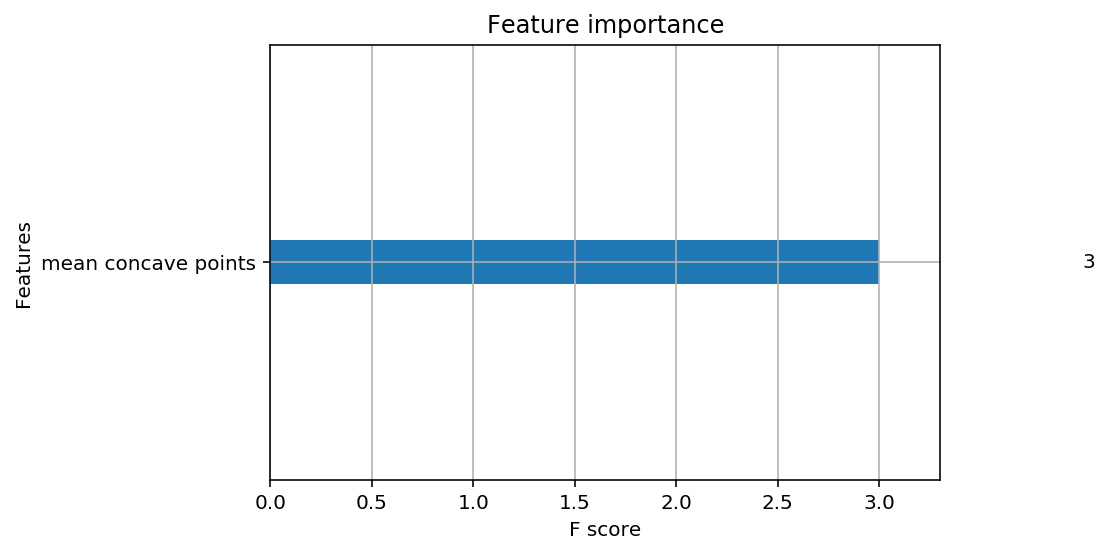

In [55]:
#plot important features
plt.figure(figsize=(10,10))
xgb.plot_importance(xgb_model)

In [56]:
#let's create a data frame that contains information about how important each question is in generating the correct prediction!
feature_importances = pd.DataFrame(xgb_model.feature_importances_,
                                   index = x_train.columns,
                                   columns=['importance']).sort_values('importance',                                                                                        ascending=False)

In [57]:
#display the dataframe. Which questions do you think are important?
feature_importances[0:5]

,importance
mean concave points,1.0
mean radius,0.0
concavity error,0.0
worst symmetry,0.0
worst concave points,0.0


<h4>8- Parameters Tuning (Optional)</h4>

In [24]:
xgb_model = XGBClassifier()                                                              #define the model
learning_rate=[                         ]                                                #pick a range of learning rates
n_estimators=[          ]                                                                #pick a range of number of trees
max_depth=[     ]                                                                        #pick a range of max depth

param=dict(learning_rate=learning_rate,
                max_depth=max_depth,
                n_estimators=n_estimators)

kfolds=StratifiedKFold(n_splits=10,shuffle=True,random_state=5)                           #10 fold cross validation
grid_search=GridSearchCV(xgb_model,param,scoring='neg_log_loss',n_jobs=1,cv=kfolds)       #grid search
grid_results=grid_search.fit(x_train,y_train)                                             #run the model


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [26]:
#what are the best parameters?
grid_results.best_params_

{'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200}

In [27]:
#save the model!
from sklearn.externals import joblib

joblib.dump(xgb_model, "cancer_classifier.pkl")    #save the whole model into a file to be used later

#to load the model next time we just need to do:
#classifer = joblib.load("model.pkl")
#classifer.predict(newobs)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['cancer_classifier.pkl']

<center><h3>Congratulations! You have built your first classifier!</h3></center>
<center><h5>www.thecodinghive.com</h5></center>